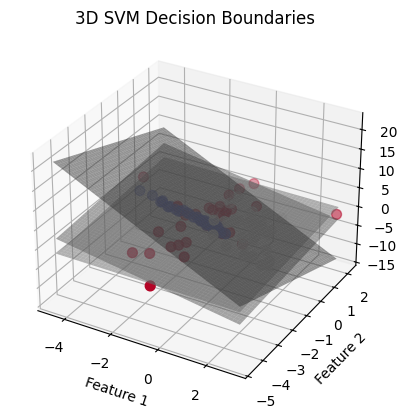

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

# 1. تولید داده‌های سه‌بعدی با ۳ کلاس
X, y = make_classification(n_samples=100, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

# 2. آموزش مدل SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# 3. نمایش داده‌ها و صفحات جداکننده
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# رسم داده‌ها
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, s=50)

# ایجاد یک شبکه برای رسم صفحات جداکننده
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))

# برای هر کلاس، صفحه جداکننده را رسم می‌کنیم
for i in range(3):
    zz = (-clf.intercept_[i] - clf.coef_[i][0] * xx - clf.coef_[i][1] * yy) / clf.coef_[i][2]
    ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D SVM Decision Boundaries')
plt.show()